# ANALIZA DANYCH DOTCZĄCYCH IRYSÓW

# 1. Opis danych

## Co zawierają dane

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

## Opis poszczególnych klas irysów

### **Iris setosa** (*kosaciec wiosenny*)  
Niska roślina (10-30 cm) z wąskimi, mieczowatymi liśćmi. Kwiaty fioletowo-niebieskie z żółtymi lub białymi akcentami, drobne, kwitną wiosną. Rośnie w kępach, preferuje suche, piaszczyste gleby.
   
### **Iris virginica** (*kosaciec wirginijski*)  
Średniej wysokości (30-90 cm) z długimi, mieczowatymi liśćmi. Kwiaty duże, zwykle niebiesko-fioletowe z żółtymi lub białymi znaczeniami, kwitną późną wiosną do wczesnego lata. Występuje na terenach podmokłych.

### **Iris versicolor** (*kosaciec pstry*)  
Wysokość 30-80 cm, liście wąskie, mieczowate. Kwiaty fioletowo-niebieskie z żółtymi lub białymi plamami, kwitną późną wiosną/wczesnym latem. Charakterystyczny dla wilgotnych siedlisk, jak bagna czy brzegi wód.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Eksploracyjna analiza danych EDA

### 10 losowo wybranych wierszy

In [6]:
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
5,5.4,3.9,1.7,0.4,Iris-setosa
91,6.1,3.0,4.6,1.4,Iris-versicolor
17,5.1,3.5,1.4,0.3,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica


### Sprawdzenie brakujcych danych

In [33]:
df.isnull()

,dł. kielicha,szer. kielicha,dł. płatka,szer. płatka,klasa
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [18]:
df.isnull().sum()

dł. kielicha      0
szer. kielicha    0
dł. płatka        0
szer. płatka      0
klasa             0
dtype: int64

### Sprawdzenie duplikatów

In [22]:
df[df.duplicated()]

,dł. kielicha,szer. kielicha,dł. płatka,szer. płatka,klasa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Sprawdzenie unikatowych wartości w poszczególnych kolumnach

In [15]:
df.nunique()

dł. kielicha      35
szer. kielicha    23
dł. płatka        43
szer. płatka      22
klasa              3
dtype: int64

### Sprawdzenie ilości wierszy dla każdego z gatunków irysów

In [24]:
df["klasa"].value_counts()

klasa
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Postawowe statystyki dla danych

In [34]:
display(df.describe())

,dł. kielicha,szer. kielicha,dł. płatka,szer. płatka
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Analiza podstawowych danych statystycznych

**Liczba obserwacji:**   
Wszystkie zmienne mają po 150 rekordów, co wskazuje, że nie ma brakujących danych.   
Duplikaty nie mają znaczenia, ponieważ wartości dla poszczególnych kwiatów mogą się powtarzać.  
Każda klasa posiada 50 wierszy, co oznacza, że w każdym z gatunków zmierzonych zostało tyle samo kwiatów.

**Średnie wartości (mean):**  
Długość kielicha: 5,84 cm
Szerokość kielicha: 3,05 cm
Długość płatka: 3,76 cm
Szerokość płatka: 1,20 cm
Te wartości sugerują, że długość kielicha jest największym wymiarem, a szerokość płatka najmniejszym.

**Odchylenie standardowe (std):**  
Długość kielicha: 0,83 cm
Szerokość kielicha: 0,43 cm
Długość płatka: 1,76 cm
Szerokość płatka: 0,76 cm
Największa zmienność występuje w długości płatka, co może wskazywać na większą różnorodność w tej cechie wśród próbek.

**Zakres wartości (min-max):**  
Długość kielicha: od 4,3 cm do 7,9 cm
Szerokość kielicha: od 2,0 cm do 4,4 cm
Długość płatka: od 1,0 cm do 6,9 cm
Szerokość płatka: od 0,1 cm do 2,5 cm
Najszerszy zakres ma długość płatka, co potwierdza dużą zmienność tej cechy.

**Kwartyle:**  
25%: Długość kielicha (5,1 cm), szerokość kielicha (2,8 cm), długość płatka (1,6 cm), szerokość płatka (0,3 cm)
50% (mediana): Długość kielicha (5,8 cm), szerokość kielicha (3,0 cm), długość płatka (4,35 cm), szerokość płatka (1,3 cm)
75%: Długość kielicha (6,4 cm), szerokość kielicha (3,3 cm), długość płatka (5,1 cm), szerokość płatka (1,8 cm)
Mediana jest zbliżona do średniej, co sugeruje symetryczny rozkład, choć w przypadku długości płatka mediana (4,35 cm) jest nieco niższa od średniej (3,76 cm), co może wskazywać na prawostronną skośność.

### Wartości maksymalne w poszczególnych gatunkach irysów dla długości i szerokości kielicha i płatków

In [117]:
df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].max()

,klasa (class),długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
0,Iris-setosa,5.8,4.4,1.9,0.6
1,Iris-versicolor,7.0,3.4,5.1,1.8
2,Iris-virginica,7.9,3.8,6.9,2.5


### Wartości minimalne w poszczególnych gatunkach irysów dla długości i szerokości kielicha i płatków

In [118]:
df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].min() 

,klasa (class),długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
0,Iris-setosa,4.3,2.3,1.0,0.1
1,Iris-versicolor,4.9,2.0,3.0,1.0
2,Iris-virginica,4.9,2.2,4.5,1.4


### Średnia w poszczególnych gatunkach irysów dla długości i szerokości kielicha i płatków

In [119]:
df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].mean()

,klasa (class),długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


### Mediana w poszczególnych klasach irysów dla długości i szerokości kielicha i płatków

In [120]:
df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].median()

,klasa (class),długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
0,Iris-setosa,5.0,3.4,1.50,0.2
1,Iris-versicolor,5.9,2.8,4.35,1.3
2,Iris-virginica,6.5,3.0,5.55,2.0


### Odchylenie standardowe w poszczególnych gatunkach irysów dla długości i szerokości kielicha i płatków

In [121]:
df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].std()

,klasa (class),długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
0,Iris-setosa,0.352490,0.381024,0.173511,0.107210
1,Iris-versicolor,0.516171,0.313798,0.469911,0.197753
2,Iris-virginica,0.635880,0.322497,0.551895,0.274650


### Barplot pokazujcy średnią długość i szerokość kielicha i płatków w poszczególnych gatunkach irysów

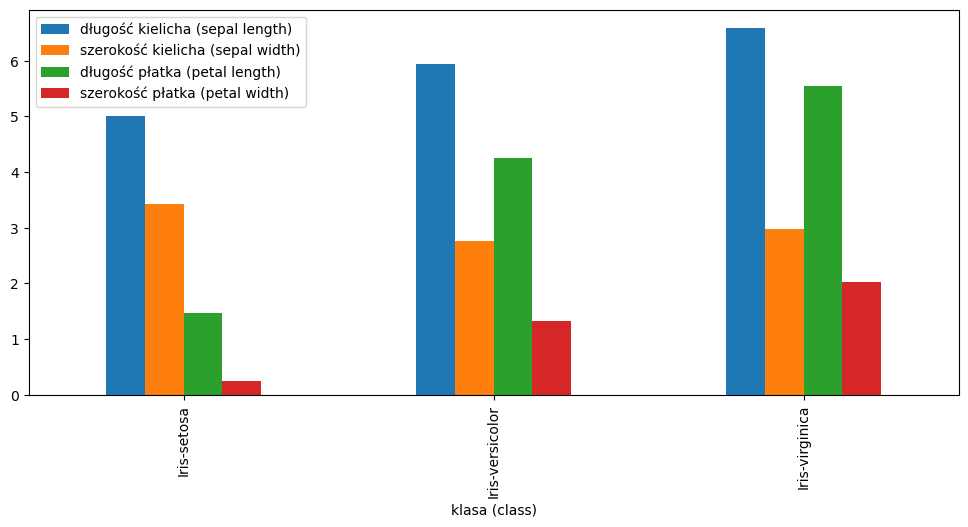

In [13]:
mean_class = df.groupby('klasa (class)', as_index=False)[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']].mean()
mean_class.plot(kind='bar', x='klasa (class)', y=['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)'], figsize = (12, 5));

### Scatterplot pokazujcy korelacje pomiędzy długością i szerokością kielicha w poszczególnych gatunkach irysów

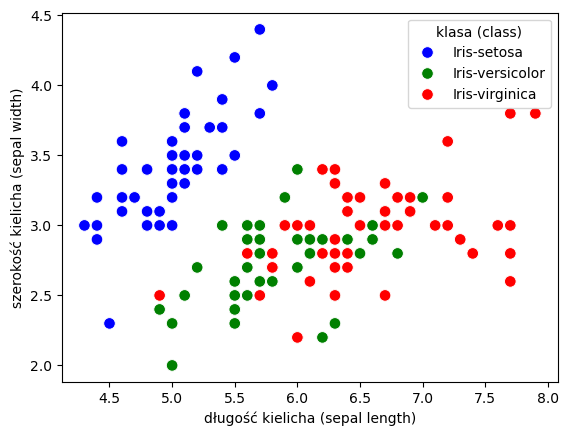

In [14]:
sns.scatterplot(data=df,
                x='długość kielicha (sepal length)', y='szerokość kielicha (sepal width)',
                hue='klasa (class)', palette=['blue','green','red'],
                s=70, edgecolor='white');

### Scatterplot pokazujcy korelacje pomiędzy długością i szerokością płatka w poszczególnych gatunkach irysów

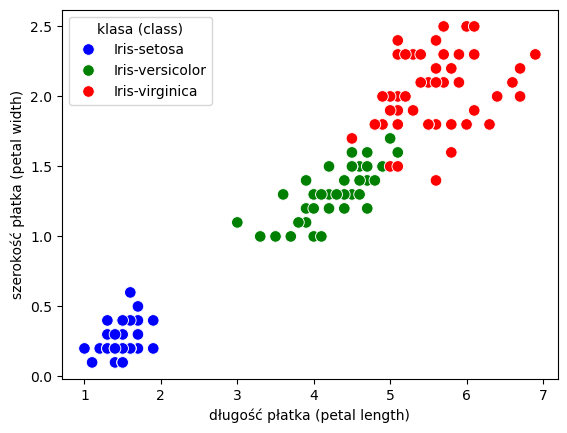

In [15]:
sns.scatterplot(data=df,
                x='długość płatka (petal length)', y= 'szerokość płatka (petal width)',
                hue='klasa (class)', palette=['blue','green','red'],
                s=70, edgecolor='white');

### Boxplot pokazujcy zróżnicowanie w długościach i szerokościach kielichów i płatków oraz wartości odstające zbiorczo we wszystkich gatunkach irysów

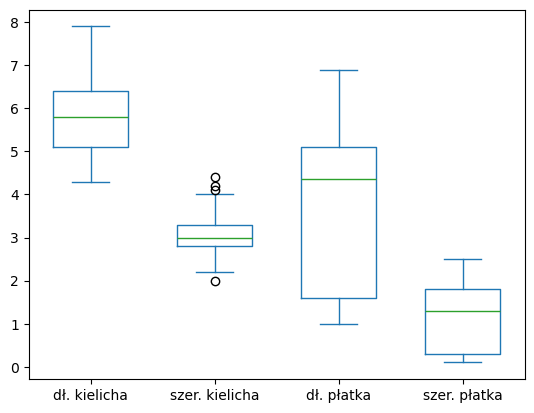

In [12]:
short_labels = ['dł. kielicha', 'szer. kielicha', 'dł. płatka', 'szer. płatka']
df.plot(kind='box', widths=0.6)
plt.xticks(range(1, len(short_labels) + 1), short_labels, rotation=0);

### Macierz korelacji poszczególnych cech irysów zbiorczo dla wszystkich gatunków

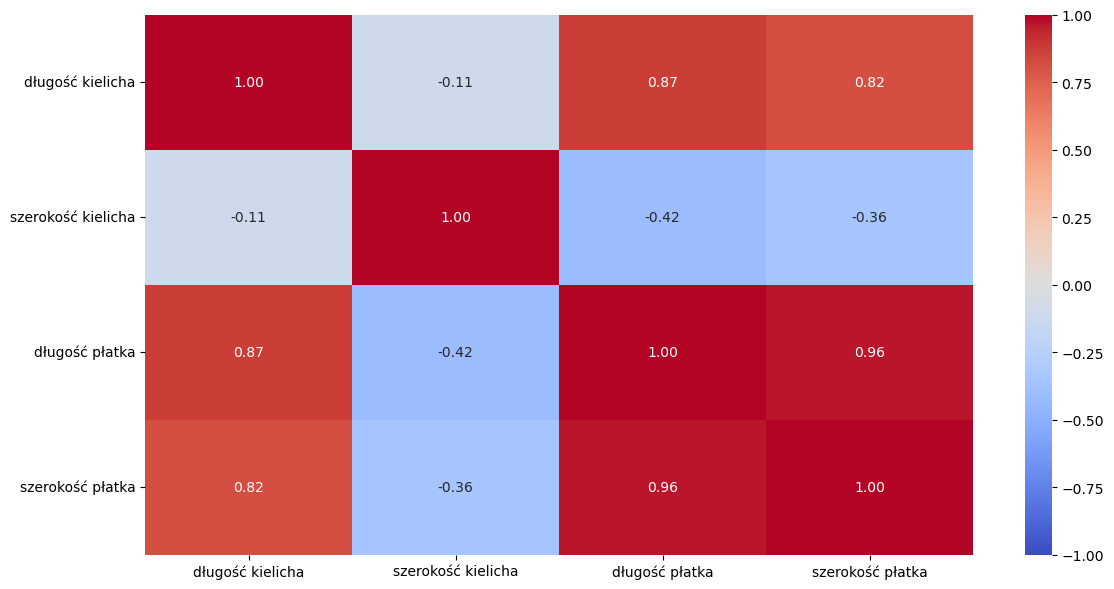

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

corr_matrix.index = ['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka']
corr_matrix.columns = ['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka']

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.tight_layout()
plt.show();

# 4. Wnioski końcowe

### **Różnice w rozmiarach kielichów między gatunkami**  

**Iris setosa:**  
Kielichy są stosunkowo krótkie (średnia długość: 5,01 cm, zakres: 4,3–5,8 cm), ale szerokie (średnia szerokość: 3,42 cm, zakres: 2,3–4,4 cm). To sugeruje, że ten gatunek ma proporcjonalnie szersze kielichy w stosunku do ich długości, gatunek setosa wyróżnia się największą szerokością kielicha wśród gatunków.  
**Iris versicolor:**  
Kielichy są dłuższe niż u setosa (średnia długość: 5,94 cm, zakres: 4,9–7,0 cm), ale węższe (średnia szerokość: 2,77 cm, zakres: 2,0–3,4 cm). Gatunek wykazuje umiarkowaną zmienność, co odzwierciedla adaptację do wilgotnych środowisk, takich jak bagna.  
**Iris virginica:**  
Kielichy są najdłuższe (średnia długość: 6,59 cm, zakres: 4,9–7,9 cm) i umiarkowanie szerokie (średnia szerokość: 2,97 cm, zakres: 2,2–3,8 cm). To czyni virginica największym gatunkiem pod względem długości kielicha - ten gatunek ma najwyższe wartości maksymalne i kwartyle.

**Ogólny wniosek:**  
Długość kielicha wzrasta od setosa przez versicolor do virginica. Szerokość kielicha jest największa u setosa, co może pomagać w ochronie przed wysychaniem, podczas gdy u pozostałych gatunków jest mniejsza, dostosowana do wilgotniejszych warunków.  

### **Różnice w rozmiarach płatków między gatunkami**

**Iris setosa:**  
Płatki są najmniejsze – krótkie (średnia długość: 1,46 cm, zakres: 1,0–1,9 cm) i wąskie (średnia szerokość: 0,24 cm, zakres: 0,1–0,6 cm). Setosa ma płatki znacząco mniejsze od innych gatunków, co czyni ją łatwą do odróżnienia (niska zmienność).  
**Iris versicolor:**  
Płatki są średniej wielkości – dłuższe (średnia długość: 4,26 cm, zakres: 3,0–5,1 cm) i szersze (średnia szerokość: 1,33 cm, zakres: 1,0–1,8 cm) niż u setosa, ale mniejsze niż u virginica. Ten gatunek wykazuje umiarkowaną zmienność z nakładaniem się na virginica w niektórych zakresach.  
**Iris virginica:**  
Płatki są największe – najdłuższe (średnia długość: 5,55 cm, zakres: 4,5–6,9 cm) i najszersze (średnia szerokość: 2,03 cm, zakres: 1,4–2,5 cm). Gatunek charakteryzuje się dużą rozpiętością wartości, co sugeruje większą różnorodność morfologiczną w wilgotnych siedliskach.

**Ogólny wniosek:**  
Płatki są kluczowym wyróżnikiem gatunków – setosa ma je najmniejsze i najmniej zmienne, co może być związane z wczesnym kwitnieniem wiosennym. Versicolor i virginica mają dłuższe płatki, ale virginica dominuje pod względem rozmiaru, co ułatwia przyciąganie zapylaczy w konkurencyjnych środowiskach.  

### **Korelacje między cechami budowy**  
Macierz korelacji pokazuje silne powiązania:
- Długość płatka jest mocno skorelowana z szerokością płatka (korelacja: 0,96) – większe płatki są proporcjonalnie szersze we wszystkich gatunkach.
- Długość kielicha koreluje pozytywnie z długością płatka (0,87) i szerokością płatka (0,82), co wskazuje, że większe irysy mają proporcjonalnie większe elementy budowy.
- Szerokość kielicha ma słabą ujemną korelację z innymi cechami (np. -0,42 z długością płatka), co sugeruje, że szersze kielichy niekoniecznie idą w parze z większymi płatkami (widoczne zwłaszcza u setosa).  

**Ogólny wniosek:**  
Budowa irysów wykazuje silne korelacje w obrębie płatków i między kielichami a płatkami, co wskazuje na ewolucyjne adaptacje. Płatki są bardziej zmienne i lepiej rozróżniają gatunki niż kielichy.  

### **Konkluzja**  
Gatunki irysów wykazują wyraźne różnice w rozmiarach: setosa jest najmniejsza i najbardziej jednorodna (adaptacja do suchych warunków), versicolor średnia (wilgotne siedliska), a virginica największa i najbardziej zmienna (tereny podmokłe). Różnice te ułatwiają klasyfikację gatunków. Mniejsze płatki setosa mogą minimalizować utratę wody, podczas gdy większe u virginica zwiększają atrakcyjność dla zapylaczy. Kielichy u setosa są szersze, co może zapewniać lepszą ochronę.

In [41]:
!jupyter nbconvert Irysy_zadanie_domowe__modul_4_1.ipynb --to html --no-input --no-prompt --output Irysy_zadanie_domowe__modul_4_1.html

[NbConvertApp] Converting notebook Irysy_zadanie_domowe__modul_4_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 540388 bytes to Irysy_zadanie_domowe__modul_4_1.html
